In [387]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [388]:
img = cv2.pyrDown(cv2.imread("./datasets/1.JPG", cv2.IMREAD_UNCHANGED))

(-0.5, 127.5, 127.5, -0.5)

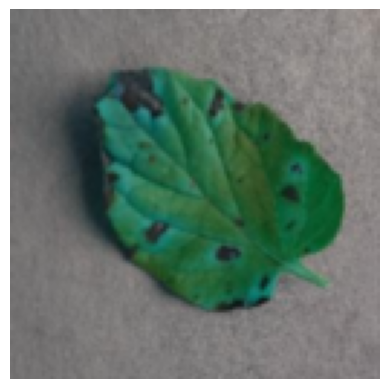

In [389]:
plt.imshow(img)
plt.axis('off')

In [390]:
mask = np.zeros(img.shape[:2], np.uint8)

In [391]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [392]:
rect = (10, 1, 200, 100)

In [393]:
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.84792219e-01, 3.40583554e-01, 1.60300619e-01, 1.16091954e-01,
         9.82316534e-02, 1.39886371e+02, 1.34953741e+02, 1.34451413e+02,
         1.21088525e+02, 1.19088525e+02, 1.18734683e+02, 8.52553778e+01,
         9.29591837e+01, 9.06497518e+01, 1.27578827e+02, 1.23548363e+02,
         1.22783701e+02, 1.01500450e+02, 1.01854185e+02, 1.01972097e+02,
         4.50209288e+01, 4.52930982e+01, 3.93959072e+01, 4.52930982e+01,
         4.58125139e+01, 3.97153867e+01, 3.93959072e+01, 3.97153867e+01,
         3.54205669e+01, 3.87054343e+01, 3.86954343e+01, 3.79702682e+01,
         3.86954343e+01, 3.87054343e+01, 3.79702682e+01, 3.79702682e+01,
         3.79702682e+01, 3.74915281e+01, 2.02347422e+03, 1.61071588e+03,
         1.52950533e+03, 1.61071588e+03, 1.3

In [394]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask2[:, :, np.newaxis]

(-0.5, 127.5, 127.5, -0.5)

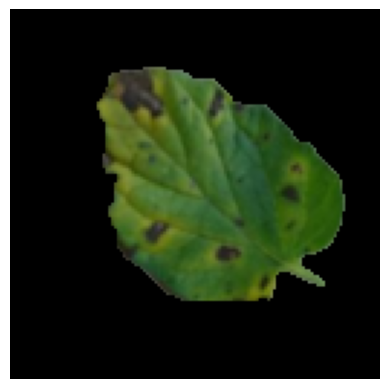

In [395]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [396]:
ret, thresh = cv2.threshold(img, 0.1, 255, cv2.THRESH_BINARY)

(-0.5, 127.5, 127.5, -0.5)

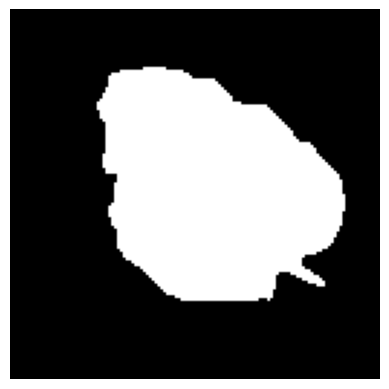

In [397]:
plt.imshow(thresh)
plt.axis('off')